In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import uproot3 as uproot
import pandas as pd
import numpy as np
import math
from tqdm import tqdm

import pickle

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from IPython.display import display

# uproot can be any version 3 I think
print(uproot.__version__)

3.14.4


In [2]:
# this version doesn't load WC files, not planning smearing or 0p/Np truth categories anymore

In [3]:
# getting Xp numbers from previous data release
# copied from generate_text.ipynb
# new things have to match this exactly

nueFC_background = [
    0.00,
    1.64,
    2.13,
    4.99,
    3.66,
    6.57,
    5.87,
    4.84,
    3.99,
    2.28,
    3.51,
    1.47,
    2.22,
    2.34,
    1.98,
    1.65,
    2.03,
    1.39,
    0.82,
    1.16,
    1.57,
    0.75,
    0.87,
    1.11,
    0.56,
    5.19,
]    

nueFC_signal = [
     0.03,
     0.75,
     3.60,
     7.85,
    12.84,
    17.48,
    20.34,
    21.39,
    22.00,
    21.75,
    21.78,
    19.67,
    18.87,
    16.94,
    15.75,
    14.11,
    12.39,
    12.22,
    10.39,
     9.01,
     7.96,
     7.24,
     6.12,
     5.57,
     4.82,
    27.15,
]

nuePC_background = [
    0.00,
    0.34,
    2.54,
    1.22,
    0.77,
    2.03,
    2.68,
    3.90,
    1.78,
    2.29,
    2.53,
    2.68,
    2.42,
    1.85,
    1.60,
    2.55,
    2.03,
    2.51,
    1.65,
    1.59,
    1.07,
    2.32,
    1.30,
    0.91,
    1.45,
    9.98,
]

nuePC_signal = [
     0.00,
     0.47,
     1.81,
     3.67,
     6.41,
     8.15,
     9.64,
    10.90,
    12.03,
    11.98,
    11.07,
    11.56,
    10.60,
     9.93,
     9.30,
     8.44,
     7.62,
     7.39,
     6.87,
     5.84,
     5.83,
     4.96,
     4.25,
     3.74,
     3.26,
    21.76,
]    

numuFC_background = [
      2.81,
      7.17,
    158.85,
    370.86,
    501.18,
    551.64,
    552.78,
    475.03,
    419.69,
    355.69,
    299.34,
    244.17,
    198.27,
    156.30,
    137.38,
     96.38,
     63.56,
     45.37,
     35.67,
     32.55,
     19.73,
     19.24,
     12.95,
     10.08,
      9.30,
     54.57,
]    

numuFC_signal = [
       1.09,
      10.23,
     783.85,
    2265.85,
    3480.27,
    4102.25,
    4384.92,
    4107.73,
    3488.79,
    2787.53,
    2136.44,
    1646.03,
    1126.66,
     741.78,
     519.47,
     375.63,
     220.00,
     137.87,
     114.58,
      72.31,
      40.53,
      23.32,
      16.20,
      14.92,
       7.39,
      34.26,
]    

numuPC_background = [
      10.08,
      35.15,
     338.62,
     656.57,
     915.63,
    1027.43,
    1056.02,
    1011.42,
     929.12,
     774.05,
     644.26,
     525.00,
     413.65,
     319.93,
     268.89,
     221.38,
     161.93,
     132.04,
     107.41,
      98.22,
      75.42,
      65.86,
      62.39,
      49.44,
      41.50,
     280.66,
]    

numuPC_signal = [
        9.58,
      169.97,
     2274.28,
     5800.05,
     8867.03,
    10132.36,
     9893.77,
     8879.55,
     7301.43,
     5780.96,
     4418.41,
     3111.43,
     2250.19,
     1601.66,
     1042.59,
      782.16,
      551.53,
      391.59,
      288.62,
      204.60,
      158.92,
      126.92,
       91.07,
       75.38,
       57.04,
      233.78,
]    

CCpi0FC_background = [
    268.43,
    181.14,
    110.64,
     69.97,
     53.37,
     28.87,
     18.11,
     12.55,
      9.55,
      5.20,
     33.47,
]    

CCpi0FC_signal = [
    783.91,
    622.73,
    409.42,
    227.99,
    117.62,
     69.70,
     34.52,
     25.33,
     16.78,
      9.02,
     42.26,
]    

CCpi0PC_background = [
    534.76,
    375.93,
    230.84,
    168.51,
    103.27,
     62.68,
     40.75,
     24.34,
     21.49,
     18.49,
     66.82,
]    

CCpi0PC_signal = [
    1383.31,
    1047.79,
     702.69,
     368.03,
     194.61,
     106.49,
      70.89,
      39.17,
      30.94,
      24.93,
      98.86,
]

NCpi0_background = [
    1451.54,
     720.02,
     452.24,
     301.57,
     229.03,
     144.64,
      88.60,
      56.93,
      38.10,
      35.64,
     169.83,
]    

NCpi0_signal = [
    1034.49,
     714.90,
     486.48,
     270.34,
     158.90,
      77.79,
      52.05,
      25.51,
      15.19,
      14.29,
      60.12,
]

nueFC_data = [
    0,
    5,
    6,
    12,
    19,
    14,
    18,
    24,
    25,
    22,
    29,
    18,
    16,
    18,
    15,
    20,
    12,
    13,
    9,
    5,
    9,
    10,
    4,
    7,
    8,
    30,
]

nuePC_data = [
     0,
     2,
     8,
     5,
     8,
    14,
     6,
    19,
    23,
    14,
    20,
    12,
    14,
    11,
    10,
    14,
     8,
     6,
     5,
     6,
     2,
     7,
     0,
     3,
     2,
    19,
]


numuFC_data = [
       6,
      20,
    1068,
    3086,
    4830,
    5603,
    5753,
    5292,
    4331,
    3448,
    2555,
    1833,
    1246,
     765,
     534,
     332,
     196,
     138,
      89,
      42,
      37,
      30,
      30,
      14,
      12,
      52,
]

numuPC_data = [
       22,
      282,
     3281,
     7647,
    11276,
    12536,
    11876,
    10433,
     8541,
     6501,
     4823,
     3484,
     2330,
     1653,
     1075,
      726,
      539,
      388,
      252,
      181,
      163,
      115,
      111,
       76,
       60,
      308,
]


seven_ch_background_from_past_release = (nueFC_background + nuePC_background
                                         + numuFC_background + numuPC_background)
                                         #+ CCpi0FC_background + CCpi0PC_background + NCpi0_background)

seven_ch_signal_from_past_release = (nueFC_signal + nuePC_signal
                                         + numuFC_signal + numuPC_signal)
                                         #+ CCpi0FC_signal + CCpi0PC_signal + NCpi0_signal)
    
seven_ch_data_from_past_release = (nueFC_data + nuePC_data + numuFC_data + numuPC_data)

pi0_totals = np.array(CCpi0FC_background + CCpi0PC_background + NCpi0_background) + np.array(CCpi0FC_signal + CCpi0PC_signal + NCpi0_signal)

seven_ch_total_from_past_release = np.array(seven_ch_background_from_past_release) + np.array(seven_ch_signal_from_past_release)



In [4]:
with open("../xiangpan_text_files/results/data_nueCC_0p_FC_both_new.txt") as f:
    lines = f.readlines()
    splits = [line.split() for line in lines]
    nue0pFC_data = [int(split[1]) for split in splits]
    nue0pFC_pred = [float(split[2]) for split in splits]
    nue0pFC_pred_lee = [float(split[3]) for split in splits]
with open("../xiangpan_text_files/results/data_nueCC_0p_PC_both_new.txt") as f:
    lines = f.readlines()
    splits = [line.split() for line in lines]
    nue0pPC_data = [int(split[1]) for split in splits]
    nue0pPC_pred = [float(split[2]) for split in splits]
    nue0pPC_pred_lee = [float(split[3]) for split in splits]
with open("../xiangpan_text_files/results/data_nueCC_Np_FC_both_new.txt") as f:
    lines = f.readlines()
    splits = [line.split() for line in lines]
    nueNpFC_data = [int(split[1]) for split in splits]
    nueNpFC_pred = [float(split[2]) for split in splits]
    nueNpFC_pred_lee = [float(split[3]) for split in splits]
with open("../xiangpan_text_files/results/data_nueCC_Np_PC_both_new.txt") as f:
    lines = f.readlines()
    splits = [line.split() for line in lines]
    nueNpPC_data = [int(split[1]) for split in splits]
    nueNpPC_pred = [float(split[2]) for split in splits]
    nueNpPC_pred_lee = [float(split[3]) for split in splits]
    
with open("../xiangpan_text_files/results/data_numuCC_0p_FC.txt") as f:
    lines = f.readlines()
    splits = [line.split() for line in lines]
    numu0pFC_data = [int(split[1]) for split in splits]
    numu0pFC_pred = [float(split[2]) for split in splits]
with open("../xiangpan_text_files/results/data_numuCC_0p_PC.txt") as f:
    lines = f.readlines()
    splits = [line.split() for line in lines]
    numu0pPC_data = [int(split[1]) for split in splits]
    numu0pPC_pred = [float(split[2]) for split in splits]
with open("../xiangpan_text_files/results/data_numuCC_Np_FC.txt") as f:
    lines = f.readlines()
    splits = [line.split() for line in lines]
    numuNpFC_data = [int(split[1]) for split in splits]
    numuNpFC_pred = [float(split[2]) for split in splits]
with open("../xiangpan_text_files/results/data_numuCC_Np_PC.txt") as f:
    lines = f.readlines()
    splits = [line.split() for line in lines]
    numuNpPC_data = [int(split[1]) for split in splits]
    numuNpPC_pred = [float(split[2]) for split in splits]
    
eleven_channel_lee = np.array(nue0pFC_pred_lee + nue0pPC_pred_lee + nueNpFC_pred_lee + nueNpPC_pred_lee + [0 for _ in range(26*4)])

eleven_channel_total_from_new_release = np.array(nue0pFC_pred + nue0pPC_pred + nueNpFC_pred + nueNpPC_pred
                        + numu0pFC_pred + numu0pPC_pred + numuNpFC_pred + numuNpPC_pred)
                        #+ list(pi0_totals))
    
eleven_channel_data_from_new_release = np.array(nue0pFC_data + nue0pPC_data + nueNpFC_data + nueNpPC_data
                        + numu0pFC_data + numu0pPC_data + numuNpFC_data + numuNpPC_data)


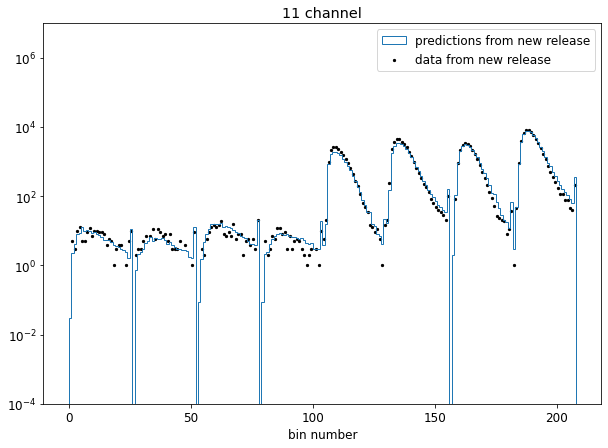

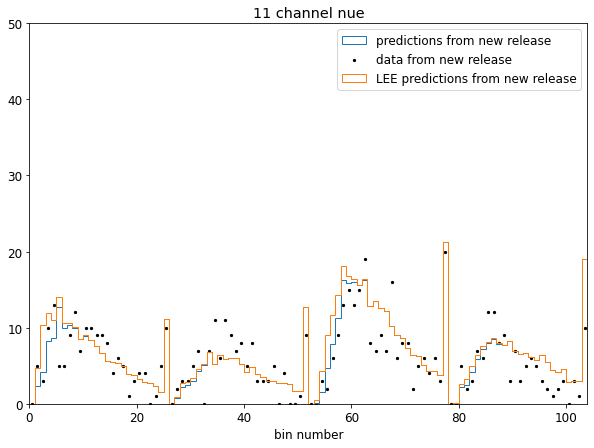

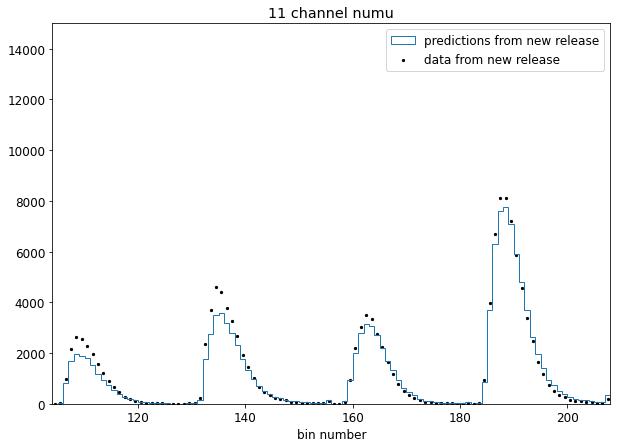

In [5]:
num_bins = 26*8
bin_centers = [0.5 + _ for _ in range(num_bins)]

mpl.rcParams.update({'font.size': 12})

plt.figure(figsize=(10,7))
plt.hist(bin_centers, weights=eleven_channel_total_from_new_release, bins=num_bins, range=(0, num_bins), histtype="step", label="predictions from new release")
plt.scatter(bin_centers, eleven_channel_data_from_new_release, label="data from new release", c="k", s=5)
plt.title("11 channel")
plt.xlabel("bin number")
plt.legend()
plt.ylim((1e-4, 1e7))
plt.yscale("log")
plt.savefig("plots/eleven_channel.png", dpi=600)
plt.show()

plt.figure(figsize=(10,7))
plt.hist(bin_centers, weights=eleven_channel_total_from_new_release, bins=num_bins, range=(0, num_bins), histtype="step", label="predictions from new release")
plt.scatter(bin_centers, eleven_channel_data_from_new_release, label="data from new release", c="k", s=5)
plt.hist(bin_centers, weights=eleven_channel_lee, bins=num_bins, range=(0, num_bins), histtype="step", label="LEE predictions from new release")
plt.title("11 channel nue")
plt.xlabel("bin number")
plt.legend()
plt.xlim((0, 26*4))
plt.ylim((0,50))
plt.savefig("plots/eleven_channel_nue.png", dpi=600)
plt.show()

plt.figure(figsize=(10,7))
plt.hist(bin_centers, weights=eleven_channel_total_from_new_release, bins=num_bins, range=(0, num_bins), histtype="step", label="predictions from new release")
plt.scatter(bin_centers, eleven_channel_data_from_new_release, label="data from new release", c="k", s=5)
plt.title("11 channel numu")
plt.xlabel("bin number")
plt.legend()
plt.xlim((26*4, 26*8))
plt.ylim((0,15000))
plt.savefig("plots/eleven_channel_numu.png", dpi=600)
plt.show()


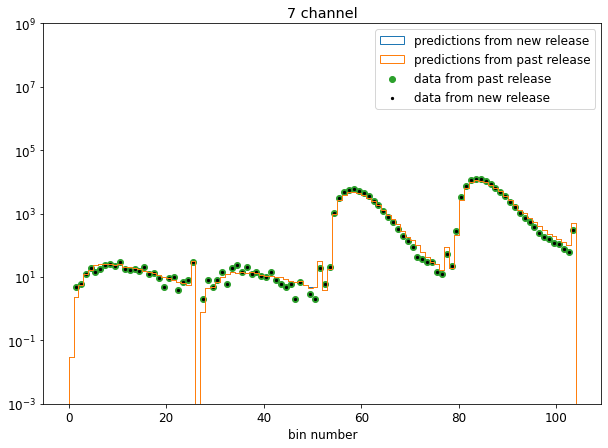

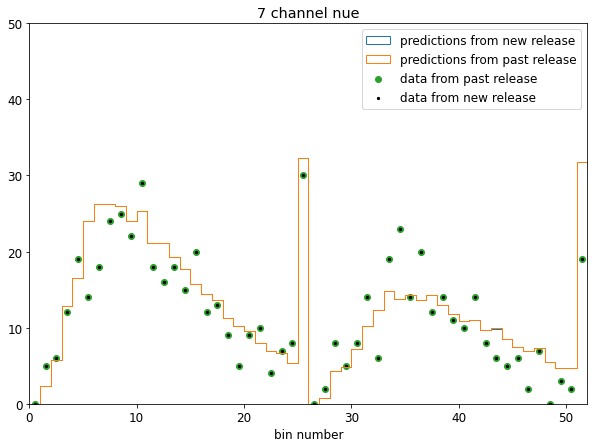

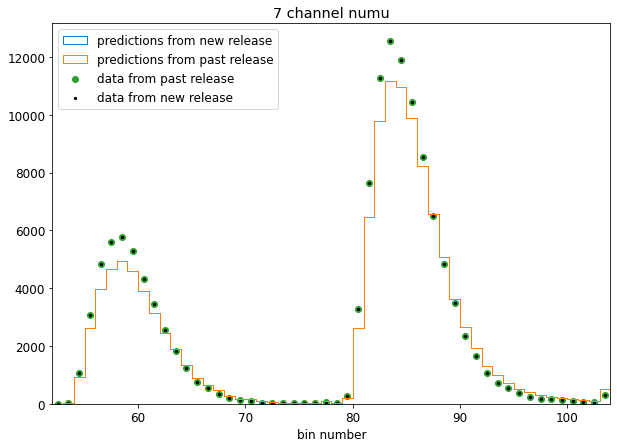

In [6]:
num_bins = 26*4
bin_centers = [0.5 + _ for _ in range(num_bins)]

collapsed_eleven_channel_total_from_new_release = []
collapsed_eleven_channel_total_from_new_release += list(eleven_channel_total_from_new_release[0:26] + eleven_channel_total_from_new_release[26*2:26*3])
collapsed_eleven_channel_total_from_new_release += list(eleven_channel_total_from_new_release[26:26*2] + eleven_channel_total_from_new_release[26*3:26*4])
collapsed_eleven_channel_total_from_new_release += list(eleven_channel_total_from_new_release[26*4:26*5] + eleven_channel_total_from_new_release[26*6:26*7])
collapsed_eleven_channel_total_from_new_release += list(eleven_channel_total_from_new_release[26*5:26*6] + eleven_channel_total_from_new_release[26*7:26*8])
collapsed_eleven_channel_total_from_new_release += list(eleven_channel_total_from_new_release[26*8:])
collapsed_eleven_channel_total_from_new_release = np.array(collapsed_eleven_channel_total_from_new_release)

collapsed_eleven_channel_data_from_new_release = []
collapsed_eleven_channel_data_from_new_release += list(eleven_channel_data_from_new_release[0:26] + eleven_channel_data_from_new_release[26*2:26*3])
collapsed_eleven_channel_data_from_new_release += list(eleven_channel_data_from_new_release[26:26*2] + eleven_channel_data_from_new_release[26*3:26*4])
collapsed_eleven_channel_data_from_new_release += list(eleven_channel_data_from_new_release[26*4:26*5] + eleven_channel_data_from_new_release[26*6:26*7])
collapsed_eleven_channel_data_from_new_release += list(eleven_channel_data_from_new_release[26*5:26*6] + eleven_channel_data_from_new_release[26*7:26*8])
collapsed_eleven_channel_data_from_new_release += list(eleven_channel_data_from_new_release[26*8:])
collapsed_eleven_channel_data_from_new_release = np.array(collapsed_eleven_channel_data_from_new_release)

mpl.rcParams.update({'font.size': 12})

plt.figure(figsize=(10,7))

plt.hist(bin_centers, weights=collapsed_eleven_channel_total_from_new_release, bins=num_bins, range=(0, num_bins), histtype="step", 
         label="predictions from new release")
plt.hist(bin_centers, weights=seven_ch_total_from_past_release, bins=num_bins, range=(0, num_bins), histtype="step", 
         label="predictions from past release")
#plt.hist(bin_centers, weights=seven_ch_signal_from_past_release, bins=num_bins, range=(0, num_bins), histtype="step", 
#         label="total signal prediction from past release")
#plt.hist(bin_centers, weights=seven_ch_background_from_past_release, bins=num_bins, range=(0, num_bins), histtype="step", 
#         label="background prediction from past release")
plt.scatter(bin_centers, seven_ch_data_from_past_release, label="data from past release")
plt.scatter(bin_centers, collapsed_eleven_channel_data_from_new_release, s=5, c="k", label="data from new release")

plt.title("7 channel")
plt.xlabel("bin number")
plt.yscale("log")
plt.ylim((1e-3, 1e9))
plt.legend()
#plt.ylim((0, 20))
plt.savefig("plots/seven_channel.png", dpi=600)
plt.show()

plt.figure(figsize=(10,7))

plt.hist(bin_centers, weights=collapsed_eleven_channel_total_from_new_release, bins=num_bins, range=(0, num_bins), histtype="step", 
         label="predictions from new release")
plt.hist(bin_centers, weights=seven_ch_total_from_past_release, bins=num_bins, range=(0, num_bins), histtype="step", 
         label="predictions from past release")
#plt.hist(bin_centers, weights=seven_ch_signal_from_past_release, bins=num_bins, range=(0, num_bins), histtype="step", 
#         label="total signal prediction from past release")
#plt.hist(bin_centers, weights=seven_ch_background_from_past_release, bins=num_bins, range=(0, num_bins), histtype="step", 
#         label="background prediction from past release")
plt.scatter(bin_centers, seven_ch_data_from_past_release, label="data from past release")
plt.scatter(bin_centers, collapsed_eleven_channel_data_from_new_release, s=5, c="k", label="data from new release")

plt.title("7 channel nue")
plt.xlabel("bin number")
plt.xlim(0, 26*2)
plt.ylim((0, 50))
plt.legend()
#plt.ylim((0, 20))
plt.savefig("plots/seven_channel_nue.png", dpi=600)

plt.show()


plt.figure(figsize=(10,7))

plt.hist(bin_centers, weights=collapsed_eleven_channel_total_from_new_release, bins=num_bins, range=(0, num_bins), histtype="step", 
         label="predictions from new release")
plt.hist(bin_centers, weights=seven_ch_total_from_past_release, bins=num_bins, range=(0, num_bins), histtype="step", 
         label="predictions from past release")
#plt.hist(bin_centers, weights=seven_ch_signal_from_past_release, bins=num_bins, range=(0, num_bins), histtype="step", 
#         label="total signal prediction from past release")
#plt.hist(bin_centers, weights=seven_ch_background_from_past_release, bins=num_bins, range=(0, num_bins), histtype="step", 
#         label="background prediction from past release")
plt.scatter(bin_centers, seven_ch_data_from_past_release, label="data from past release")
plt.scatter(bin_centers, collapsed_eleven_channel_data_from_new_release, s=5, c="k", label="data from new release")

plt.title("7 channel numu")
plt.xlabel("bin number")
plt.xlim(26*2, 26*4)
#plt.ylim((0, 50))
plt.legend()
#plt.ylim((0, 20))
plt.savefig("plots/seven_channel_numu.png", dpi=600)
plt.show()


In [10]:
covariance_matrices = []

for lee_times_ten in range(21):
    lee_times_ten_text = str(lee_times_ten).zfill(2)
    covariance_matrices.append(np.genfromtxt(f"../xiangpan_text_files/results/systematicsCOV_LEEx_{lee_times_ten_text}.txt"))



In [11]:
covariance_matrices[0].shape

(241, 241)

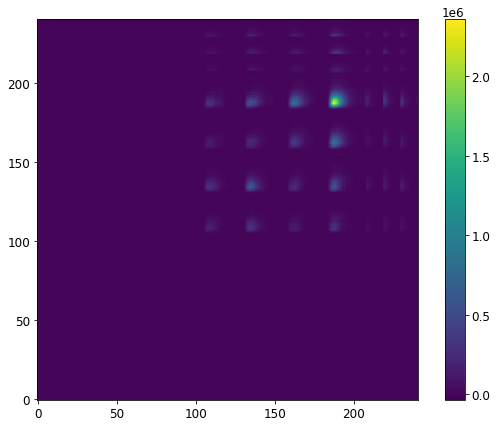

In [9]:
plt.figure(figsize=(10,7))

#plt.imshow(covariance_matrices[0], origin="lower", norm=mpl.colors.LogNorm(vmin=np.min(covariance_matrices[0]), vmax=np.max(covariance_matrices[0])))
plt.imshow(covariance_matrices[0], origin="lower")
plt.colorbar()
plt.savefig("plots/covariance_00.png")
plt.show()